In [116]:
#pip install seaborn

In [117]:
#pip install urllib3

In [118]:
#pip install requests

In [119]:
#pip install yfinance

In [120]:
#pip install pystan

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import json
import requests
from pandas.io.json import json_normalize
from datetime import datetime
import yfinance as yf

#Install Dependencies
import tensorflow as tf
from tensorflow import keras
import torch
import re

# import nltk
# from nltk.corpus import stopwords
# from nltk import tokenize
from keras.preprocessing.text import Tokenizer


from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

#statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.seasonal import seasonal_decompose

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold
#Model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math



In [122]:
from  prophet import Prophet

In [123]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_11-12.2022.csv")


In [124]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_dec_jan.csv")

                                                                                    Collect data from yfinance 

In [125]:
sp500=yf.Ticker("^GSPC")

In [126]:
GTHX=yf.Ticker("GTHX")

In [127]:
sp500.get_news()

[{'uuid': 'd97735ff-000d-36f7-b7c8-fd47eb1995cc',
  'title': 'GLOBAL MARKETS-Shares edge up as U.S. holiday interrupts interest-rate reality check',
  'publisher': 'Reuters',
  'link': 'https://finance.yahoo.com/news/global-markets-shares-edge-u-092626432.html',
  'providerPublishTime': 1676885186,
  'type': 'STORY',
  'relatedTickers': ['CL=F', 'HG=F', '^GSPC']},
 {'uuid': 'f1f35b36-825f-32f7-9041-fb8fad6878ac',
  'title': 'Stocks Rise on China Recovery Bets; Dollar Stalls: Markets Wrap',
  'publisher': 'Bloomberg',
  'link': 'https://finance.yahoo.com/news/dollar-rises-stocks-face-headwinds-223931797.html',
  'providerPublishTime': 1676882429,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/ie4GI_m4m50KcOB7braa4A--~B/aD0yNjY3O3c9NDAwMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/bloomberg_markets_842/97553c27669e16d7a13efcb8258d2d28',
     'width': 4000,
     'height': 2667,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu

In [128]:
index_price=sp500.history(start="2022-11-01", end="2023-01-12",)

In [129]:
index_price_13m=sp500.history(start="2022-01-01", end="2023-01-31",)
index_price_13m.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)
index_price_13m=index_price_13m.tz_localize(None)

In [130]:
index_price.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)

In [131]:
index_price=index_price.tz_localize(None)

In [132]:
index_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    49 non-null     float64
 1   High    49 non-null     float64
 2   Low     49 non-null     float64
 3   Close   49 non-null     float64
 4   Volume  49 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


                                                                                    DATA WRANGLING & CLEANING 

In [133]:
#index=pd.read_csv

In [134]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   title         10000 non-null  object
 2   url           10000 non-null  object
 3   description   10000 non-null  object
 4   source        10000 non-null  object
 5   tickers       10000 non-null  object
 6   tags          10000 non-null  object
 7   published_at  10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [135]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [136]:
news_2.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [137]:
news.isna().sum()

title           0
url             0
description     0
source          0
tickers         0
tags            0
published_at    0
dtype: int64

<AxesSubplot:xlabel='source', ylabel='count'>

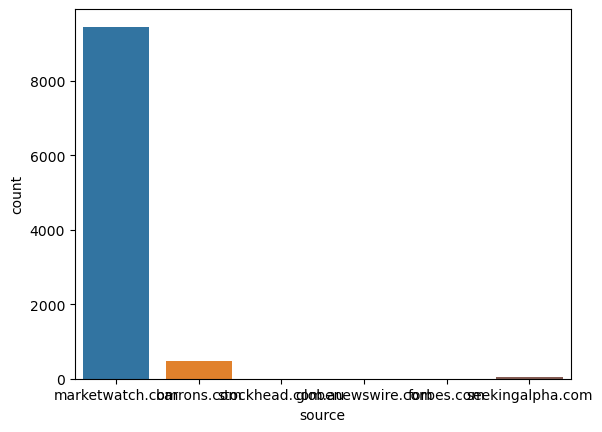

In [138]:
sns.countplot(data=news,x="source")

                                                                            FinBERT test

Test

In [139]:
tokens=tokenizer.encode("wells fargo maintains overweight on agilent technologies raises price target to 95.",return_tensors="pt")
tokens

tensor([[  101,  7051, 23054,  9319,  2058, 11179,  2006, 29003,  3372,  6786,
         13275,  3976,  4539,  2000,  5345,  1012,   102]])

In [140]:
result=model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [141]:
result.logits

tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>)

In [142]:

(torch.argmax(result.logits))+1


tensor(1)

                                                Apllying Model on tittles

In [143]:
def sentiment_score(text):
    tokens=tokenizer.encode(text,return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1




In [144]:

#news["sentiment_title"]=news["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [145]:

#news_2["sentiment_title"]=news_2["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [146]:
#news_2["sentiment_description"]=news_2["description"].apply(lambda x:sentiment_score(x[:512]))

In [147]:
#news_2.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_3.csv")

In [148]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [149]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_3.csv")

In [150]:
news=news.append(news_2)

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_40459/2509051536.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news=news.append(news_2)


In [151]:
news["date"]=pd.to_datetime(news["published_at"]).dt.date


In [212]:
news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_date.csv")

In [152]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             20000 non-null  int64 
 1   title                  20000 non-null  object
 2   url                    20000 non-null  object
 3   description            20000 non-null  object
 4   source                 20000 non-null  object
 5   tickers                20000 non-null  object
 6   tags                   20000 non-null  object
 7   published_at           20000 non-null  object
 8   sentiment_title        20000 non-null  int64 
 9   sentiment_description  20000 non-null  int64 
 10  date                   20000 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.8+ MB


In [210]:
news

,title,url,description,source,tickers,tags,published_at,sentiment_title,sentiment_description,date
0,Johnson & Johnson to buy Abiomed for $16.6 bil...,https://www.marketwatch.com/story/abiomed-stoc...,Shares of Abiomed Inc. undefined rocketed 48.8...,marketwatch.com,"['abmd', 'jnj', 'spx']","['Abmd', 'Article_Normal', 'Healthcare', 'Jnj'...",2022-11-01T09:37:35+00:00,3,1,2022-11-01
1,Abiomed stock rockets after J&J buyout deal va...,https://www.marketwatch.com/story/abiomed-stoc...,Shares of Abiomed Inc. undefined rocketed 48.8...,marketwatch.com,"['abmd', 'jnj', 'spx']","['Abmd', 'Article_Normal', 'Healthcare', 'Jnj'...",2022-11-01T09:43:11+00:00,1,1,2022-11-01
2,Bitcoin Is Holding. Traders Are Hoping the Fed...,https://www.barrons.com/articles/bitcoin-price...,Given their link to other risk-sensitive asset...,barrons.com,"['djia', 'spx']","['Adausd', 'Banking', 'Bitcoin', 'Bitcoin Usd'...",2022-11-01T09:47:00+00:00,1,1,2022-11-01
3,Bitcoin Is Holding. Traders Are Hoping the Fed...,https://www.barrons.com/articles/bitcoin-crypt...,Given their link to other risk-sensitive asset...,barrons.com,"['djia', 'spx', 'tall']","['Adausd', 'Banking', 'Bitcoin Usd', 'Blockcha...",2022-11-01T09:47:00+00:00,1,1,2022-11-01
4,Pfizer says late-stage trial of RSV vaccine pr...,https://www.marketwatch.com/story/pfizer-says-...,Pfizer Inc. undefined said Tuesday a late-stag...,marketwatch.com,"['pfe', 'spx']","['Article_Normal', 'Healthcare', 'Pfe', 'Spx',...",2022-11-01T09:48:05+00:00,1,1,2022-11-01
...,...,...,...,...,...,...,...,...,...,...
19995,Morgan Stanley stock outperforms competitors o...,https://www.marketwatch.com/story/morgan-stanl...,Shares of Morgan Stanley rose 1.23% to $90.53 ...,marketwatch.com,"['barl', 'djia', 'jpm', 'ms', 'msk', 'mwg', 'm...","['Djia', 'ETF', 'Financial Services', 'Jpm', '...",2023-01-12T22:11:00+00:00,1,1,2023-01-12
19996,"Motorola Solutions Inc. stock rises Thursday, ...",https://www.marketwatch.com/story/motorola-sol...,Shares of Motorola Solutions Inc. inched 0.14%...,marketwatch.com,"['axon', 'djia', 'lhx', 'msi', 'siox', 'spx', ...","['Axon', 'Djia', 'ETF', 'Healthcare', 'Industr...",2023-01-12T22:11:00+00:00,1,1,2023-01-12
19997,"NextEra Energy Inc. stock rises Thursday, stil...",https://www.marketwatch.com/story/nextera-ener...,Shares of NextEra Energy Inc. inched 0.08% hig...,marketwatch.com,"['aep', 'djia', 'fpl', 'nee', 'nep', 'spx']","['Aep', 'D', 'Djia', 'ETF', 'Fpl', 'Nee', 'So'...",2023-01-12T22:11:00+00:00,1,1,2023-01-12
19998,"Newmont Corp. stock rises Thursday, outperform...",https://www.marketwatch.com/story/newmont-corp...,Shares of Newmont Corp. rallied 1.79% to $53.4...,marketwatch.com,"['djia', 'nem', 'rgld', 'spx']","['Basic Materials', 'Djia', 'ETF', 'Nem', 'New...",2023-01-12T22:12:00+00:00,1,1,2023-01-12


In [153]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [154]:
news.reset_index(inplace=True)

In [155]:
news.drop(labels="index",axis=1,inplace=True)

<AxesSubplot:xlabel='sentiment_description', ylabel='count'>

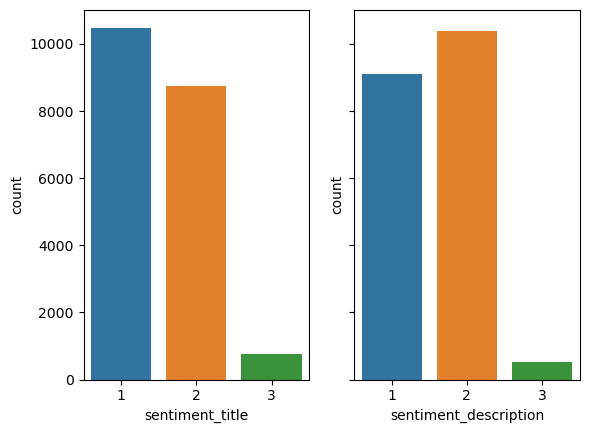

In [156]:
n_subplots=2
sharey=True
fig,axs=plt.subplots(1,n_subplots,sharey=sharey)
sns.countplot(data=news,x="sentiment_title",ax=axs[0])
sns.countplot(data=news,x="sentiment_description",ax=axs[1])



In [157]:
#news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [158]:
grouped_news=news.loc[:,["date","sentiment_title","sentiment_description"]].groupby(by="date",axis=0,dropna=True,as_index=True).mean()

In [159]:
grouped_news.head()

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000


<AxesSubplot:xlabel='date'>

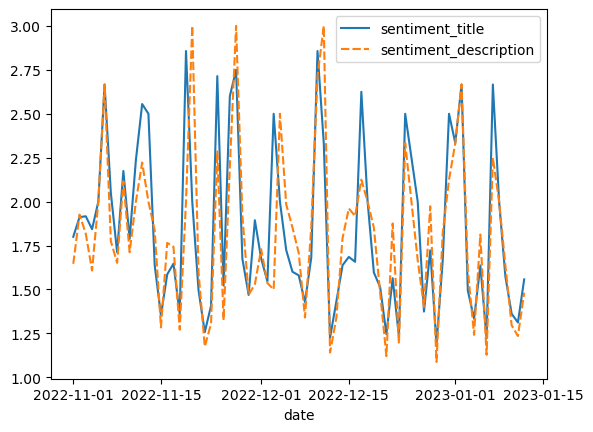

In [160]:
sns.lineplot(data=grouped_news)

In [161]:
index_price.tail(1)

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,4303360000


In [162]:
full_data=index_price.join(grouped_news, how="left")

In [163]:
full_data.drop(labels="sentiment_description",axis=1,inplace=True)

In [164]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             49 non-null     float64
 1   High             49 non-null     float64
 2   Low              49 non-null     float64
 3   Close            49 non-null     float64
 4   Volume           49 non-null     int64  
 5   sentiment_title  49 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.7 KB


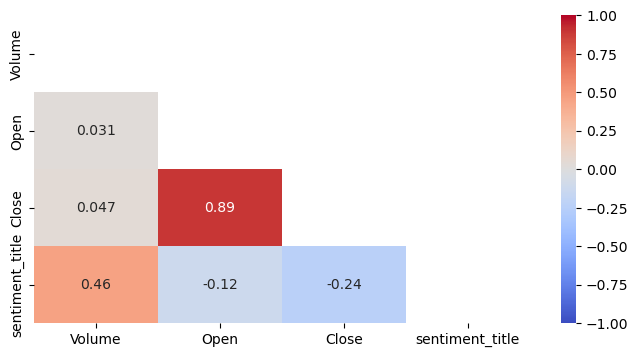

In [165]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=full_data[["Volume","Open","Close","sentiment_title"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

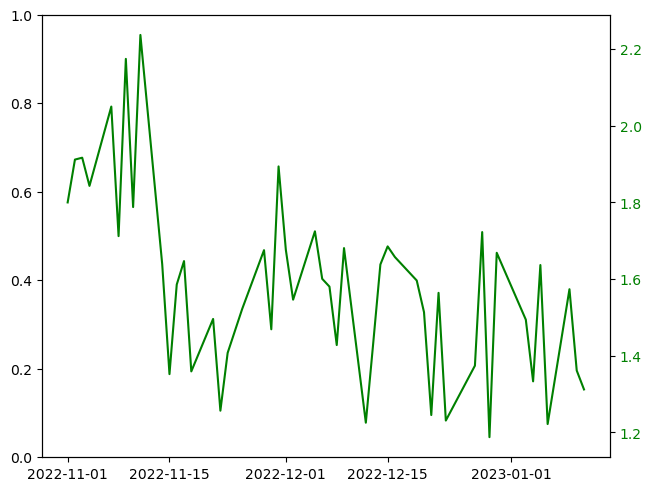

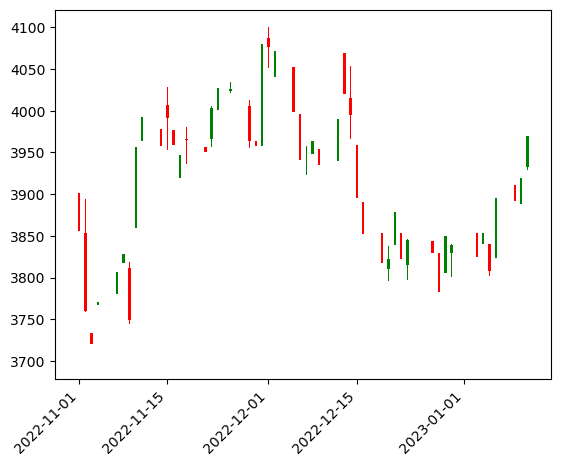

In [166]:

fig, ax = plt.subplots(constrained_layout=True)
plt.figure()
width=.4
width2=.05

up=full_data[full_data.Close>=full_data.Open]
down=full_data[full_data.Close<full_data.Open]

col1="green"
col2="red"

plt.bar(up.index,up.Close -up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High -up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low -up.Open,width2,bottom=up.Open,color=col1)


plt.bar(down.index,down.Close -down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High -down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low -down.Close,width2,bottom=down.Close,color=col2)

plt.xticks(rotation=45,ha="right")




ax2 = ax.twinx()


ax2.plot(full_data["sentiment_title"], color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.show()

<AxesSubplot:xlabel='Close', ylabel='sentiment_title'>

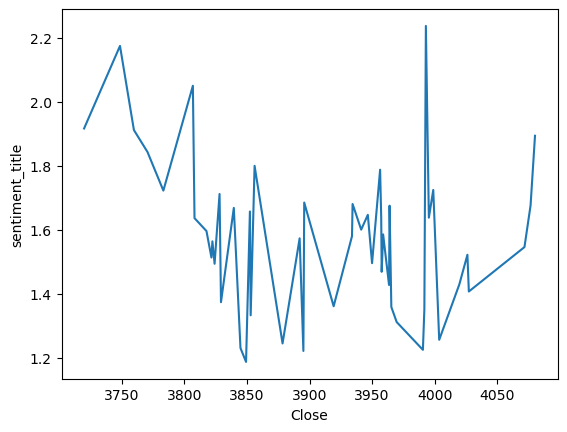

In [167]:
sns.lineplot(data=full_data, x="Close",y="sentiment_title")


                                                                            ML Linear Regression 
                                                                predict the price based on the sentiment score

Providing Data

In [168]:
ml_data=full_data.reset_index()

In [169]:
#ml_data.drop(labels="index",inplace=True,axis=1)

In [170]:
X=full_data[["sentiment_title"]]
y=full_data[["Close"]]

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34, 1)
(15, 1)
(34, 1)
(15, 1)


Standartization

Fitting Model 

In [172]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Model Prediction

In [173]:
y_predict=lr.predict(X_test)

Model Evaluation

In [174]:
print("Inrecept is " + str(lr.intercept_))
print("R-squared value is ",lr.score(X_train,y_train))
print("Adjusted R-squared value is",r2_score(y_test, y_predict,multioutput='variance_weighted'))
print("MSE:", mean_squared_error(y_test, y_predict))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_predict)))
print("MAE:",mean_absolute_error(y_test, y_predict))


Inrecept is [4046.89826045]
R-squared value is  0.054985968912599326
Adjusted R-squared value is -0.018950710897964962
MSE: 9718.440203333616
RMSE: 98.58214951670315
MAE: 85.9331722259135


In [175]:
y_prediction=pd.DataFrame(y_predict,columns={"predicted_values":y_predict})

In [176]:
y_test.reset_index(inplace=True,drop=True)
#y_test.drop(labels="index",axis=1,inplace=True)


In [177]:
lr_performance=pd.concat([y_test,y_prediction],axis=1)

In [178]:
lr_performance.rename(columns={"Close":"actual_values"},inplace=True)

<AxesSubplot:>

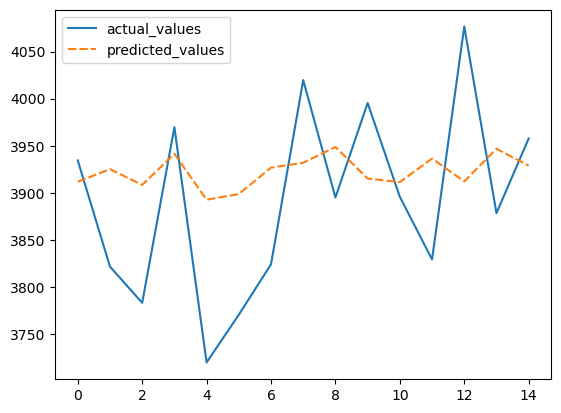

In [179]:
sns.lineplot(data=lr_performance)

                                                                                Time series decomposition

                                                                                Remooving Trend and Seasonality

In [259]:
full_data.head(10)

,Open,High,Low,Close,Volume,sentiment_title
Date,,,,,,
2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,1.800000
2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000
2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,1.712121
2022-11-09,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,2.174419
2022-11-10,3859.889893,3958.330078,3859.889893,3956.370117,5781260000,1.787879
2022-11-11,3963.719971,4001.479980,3944.820068,3992.929932,5593310000,2.236842


In [261]:
full_data.index=pd.to_datetime(full_data.index)

In [262]:
full_data

,Open,High,Low,Close,Volume,sentiment_title
Date,,,,,,
2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,1.800000
2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000
2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,1.712121
2022-11-09,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,2.174419
2022-11-10,3859.889893,3958.330078,3859.889893,3956.370117,5781260000,1.787879
2022-11-11,3963.719971,4001.479980,3944.820068,3992.929932,5593310000,2.236842


In [242]:
sentiment_title=full_data.sentiment_title
close_price=full_data.Close
open_price=full_data.Open

In [264]:
result_sentiment=seasonal_decompose(sentiment_title,model="additive",period=5)
result_close=seasonal_decompose(close_price,model="additive",period=5)
result_open=seasonal_decompose(open_price,model="additive",period=5)

In [273]:
df_sentiment_total = pd.concat([result_sentiment.seasonal, result_sentiment.trend, result_sentiment.resid, result_sentiment.observed],axis=1)
df_sentiment_total.columns=['seasonality', 'trend', 'residuals', 'sentiment']
df_sentiment_total.head(5)



,seasonality,trend,residuals,sentiment
Date,,,,
2022-11-01,-0.118713,NaN,NaN,1.800000
2022-11-02,0.079252,NaN,NaN,1.911765
2022-11-03,0.003618,1.904314,0.008735,1.916667
2022-11-04,0.003674,1.886738,-0.047275,1.843137
2022-11-07,0.032169,1.939269,0.078562,2.050000


In [271]:
df_close_total = pd.concat([result_close.seasonal, result_close.trend, result_close.resid, result_close.observed],axis=1)
df_close_total.columns=['seasonality', 'trend', 'residuals', 'close']
df_close_total.head()

,seasonality,trend,residuals,close
Date,,,,
2022-11-01,23.409797,NaN,NaN,3856.100098
2022-11-02,-6.695997,NaN,NaN,3759.689941
2022-11-03,0.622888,3782.606006,-63.339002,3719.889893
2022-11-04,0.389995,3777.008008,-6.847954,3770.550049
2022-11-07,-17.726683,3774.784033,49.742699,3806.800049


In [272]:
df_open_total = pd.concat([result_open.seasonal, result_open.trend, result_open.resid, result_open.observed],axis=1)
df_open_total.columns=['seasonality', 'trend', 'residuals', 'open']
df_open_total.head()

,seasonality,trend,residuals,open
Date,,,,
2022-11-01,-7.436047,NaN,NaN,3901.790039
2022-11-02,12.361311,NaN,NaN,3852.899902
2022-11-03,-12.646719,3807.125977,-61.229258,3733.250000
2022-11-04,4.858207,3790.171973,-28.050200,3766.979980
2022-11-07,2.863248,3781.779980,-3.933267,3780.709961


In [305]:
df_residuals=df_sentiment_total.join(df_open_total,how="left",rsuffix="_open")
df_residuals=df_residuals.join(df_close_total,how="left",rsuffix="_close")



In [306]:
df_residuals.reset_index(inplace=True)


In [310]:
df_residuals_close=df_residuals.iloc[:,[3,11]]

In [313]:
df_residuals_close.dropna(axis=0,inplace=True)

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_40459/1553128175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residuals_close.dropna(axis=0,inplace=True)


In [318]:
#Standartization

scX=StandardScaler()
df_residuals_close_st=scX.fit_transform(df_residuals_close)


In [322]:
df_residuals_close_st=pd.DataFrame(df_residuals_close_st,columns=["residual_sentiment","residual_close"])

In [345]:
#Augmented Dickey Fuller Test (ADF Test) - stationary

# ADF Test
result = adfuller(df_residuals_close_st["residual_close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.8858839260536793
n_lags: 0.0470143015916542
p-value: 0.0470143015916542
Critial Values:
   1%, -3.639224104416853
Critial Values:
   5%, -2.9512301791166293
Critial Values:
   10%, -2.614446989619377


In [346]:
#Augmented Dickey Fuller Test (ADF Test) stationary

# ADF Test
result = adfuller(df_residuals_close_st["residual_sentiment"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -8.647210017650938
n_lags: 5.2314190513620264e-14
p-value: 5.2314190513620264e-14
Critial Values:
   1%, -3.5925042342183704
Critial Values:
   5%, -2.931549768951162
Critial Values:
   10%, -2.60406594375338


<AxesSubplot:>

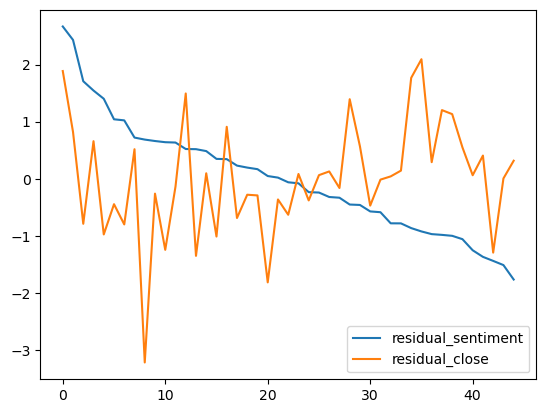

In [338]:
df_residuals_close_st.sort_values(by="residual_sentiment",axis=0,ascending=False).plot(use_index=False)


<AxesSubplot:>

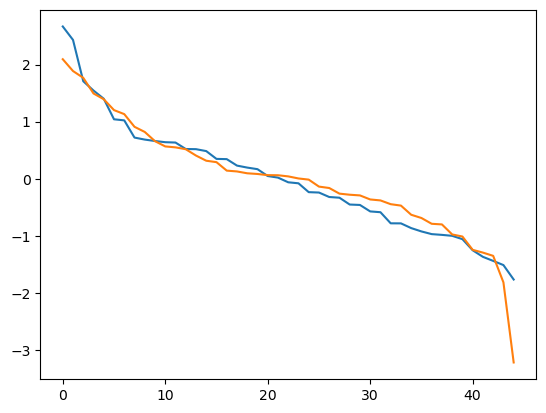

In [344]:

df_residuals_close_st["residual_sentiment"].sort_values(axis=0,ascending=False).plot(use_index=False)
df_residuals_close_st["residual_close"].sort_values(axis=0,ascending=False).plot(use_index=False)

<AxesSubplot:>

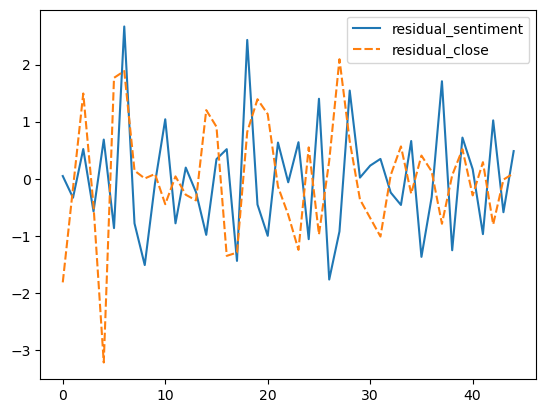

In [335]:
sns.lineplot(data=df_residuals_close_st)


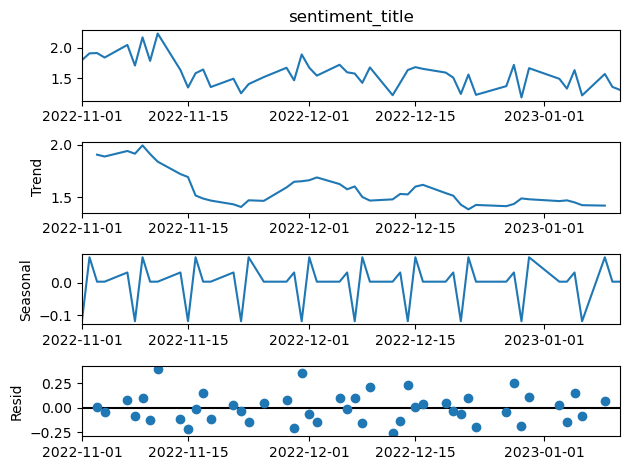

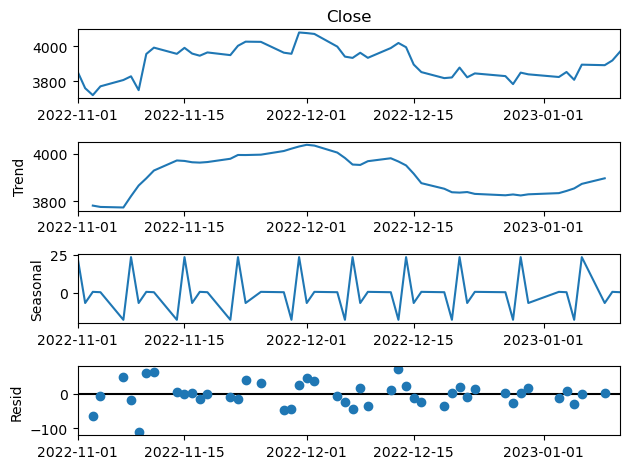

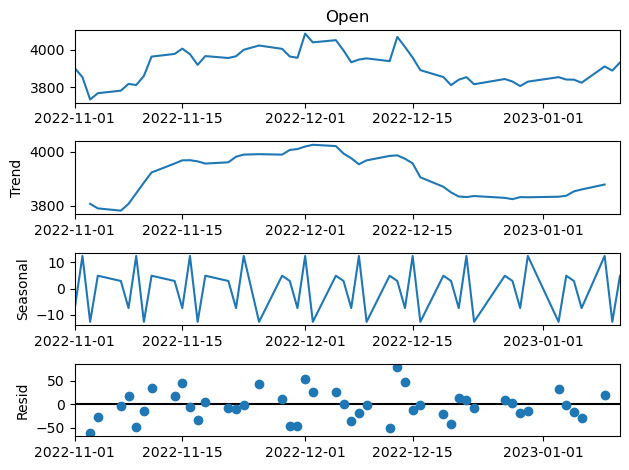

In [254]:
result_sentiment.plot()
result_close.plot()
result_open.plot()
plt.show()

                                                                        Regression analysis of the stationary data 

non-stationary data

In [181]:
#Augmented Dickey Fuller Test (ADF Test) - non-stationary

# ADF Test
result = adfuller(full_data["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.158002571112376
n_lags: 0.22183948229034844
p-value: 0.22183948229034844
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777


In [182]:
# ADF Test non-stationary
result = adfuller(index_price_13m["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.652761382221548
n_lags: 0.08257533145900703
p-value: 0.08257533145900703
Critial Values:
   1%, -3.4548957220044336
Critial Values:
   5%, -2.8723451788613157
Critial Values:
   10%, -2.572527778361272


<AxesSubplot:xlabel='Date'>

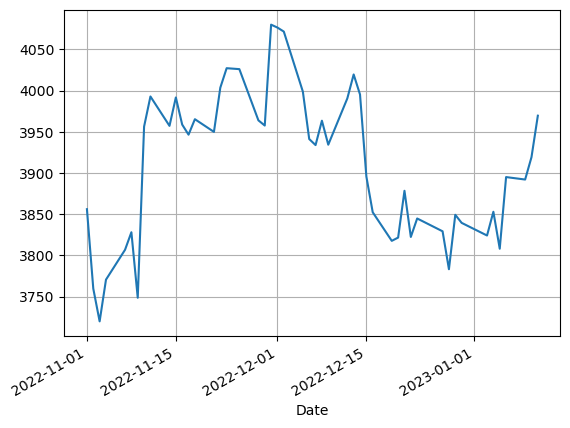

In [183]:
full_data["Close"].plot(grid="on")

<AxesSubplot:xlabel='Date'>

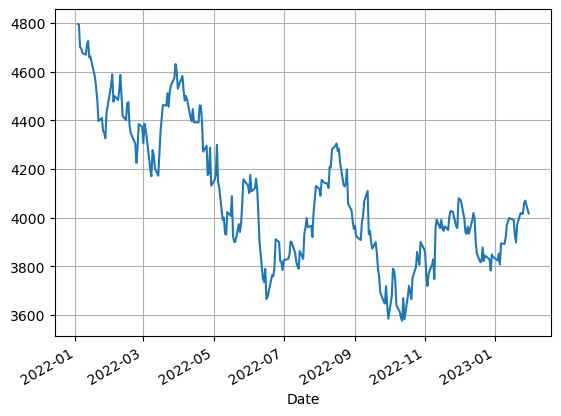

In [184]:
index_price_13m["Close"].plot(grid="on")

                                                                                            FB Prophet 

In [190]:
# Training model 

df_close=full_data.drop(["sentiment_title","Open","High","Low","Volume"],axis=1)
df_score=full_data.drop(["Close","Open","High","Low","Volume"],axis=1)


In [191]:
df_close.reset_index(inplace=True)
df_score.reset_index(inplace=True)


In [192]:
df_close = df_close.rename(columns = {'Date':'ds',"Close":"y"})
df_score = df_score.rename(columns = {'Date':'ds',"sentiment_title":"y"})

In [193]:
m=Prophet(interval_width=0.95)
model=m.fit(df_close)


10:34:48 - cmdstanpy - INFO - Chain [1] start processing


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


10:34:48 - cmdstanpy - INFO - Chain [1] done processing


In [194]:
m2=Prophet(interval_width=0.95)
model2=m2.fit(df_score)

10:34:48 - cmdstanpy - INFO - Chain [1] start processing
10:34:48 - cmdstanpy - INFO - Chain [1] done processing


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [229]:
#Forecast "Close" price
future=m.make_future_dataframe(periods=0,freq="B")
forecest_close=m.predict(future)

In [234]:
#Forecast "SEntiment title" 
future2=m2.make_future_dataframe(periods=10,freq="B")
forecest_score=m2.predict(future2)

In [230]:
forecest_close.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,2092.582391,3682.918483,3859.598675,2092.582391,2092.582391,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3772.633024
1,2022-11-02,2105.506571,3692.693866,3871.450412,2105.506571,2105.506571,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3782.174747
2,2022-11-03,2118.430751,3691.116474,3873.992290,2118.430751,2118.430751,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3787.159064
3,2022-11-04,2131.354930,3724.945593,3908.822046,2131.354930,2131.354930,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3814.476270
4,2022-11-07,2170.127469,3741.991641,3920.590970,2170.127469,2170.127469,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3831.942764


In [198]:
index_price

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000
2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000
2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,4607640000
2022-11-09,3810.939941,3818.199951,3744.219971,3748.570068,4645010000
2022-11-10,3859.889893,3958.330078,3859.889893,3956.370117,5781260000
2022-11-11,3963.719971,4001.479980,3944.820068,3992.929932,5593310000


In [231]:
forecest_close.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,2092.582391,3682.918483,3859.598675,2092.582391,2092.582391,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3772.633024
1,2022-11-02,2105.506571,3692.693866,3871.450412,2105.506571,2105.506571,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3782.174747
2,2022-11-03,2118.430751,3691.116474,3873.992290,2118.430751,2118.430751,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3787.159064
3,2022-11-04,2131.354930,3724.945593,3908.822046,2131.354930,2131.354930,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3814.476270
4,2022-11-07,2170.127469,3741.991641,3920.590970,2170.127469,2170.127469,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3831.942764
5,2022-11-08,2183.051649,3767.237691,3961.801493,2183.051649,2183.051649,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3863.102281
6,2022-11-09,2195.975829,3788.004023,3968.361957,2195.975829,2195.975829,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3872.644005
7,2022-11-10,2208.900009,3784.465458,3966.724671,2208.900009,2208.900009,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3877.628322
8,2022-11-11,2221.824189,3814.119166,3998.569266,2221.824189,2221.824189,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3904.945528
9,2022-11-14,2260.576199,3829.469745,4010.257733,2260.576199,2260.576199,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3922.391493


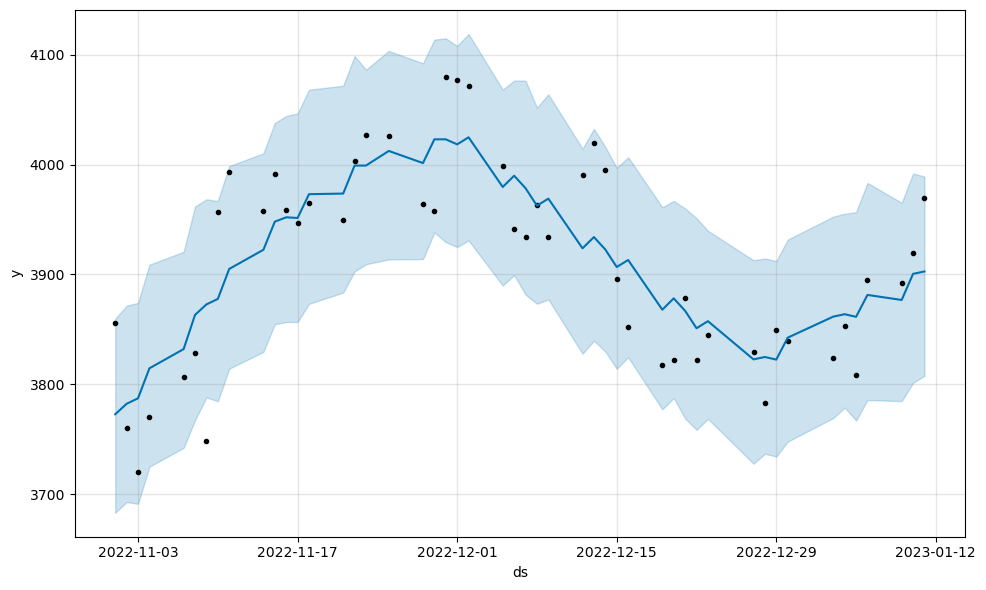

In [235]:
plot1=m.plot(forecest_close)

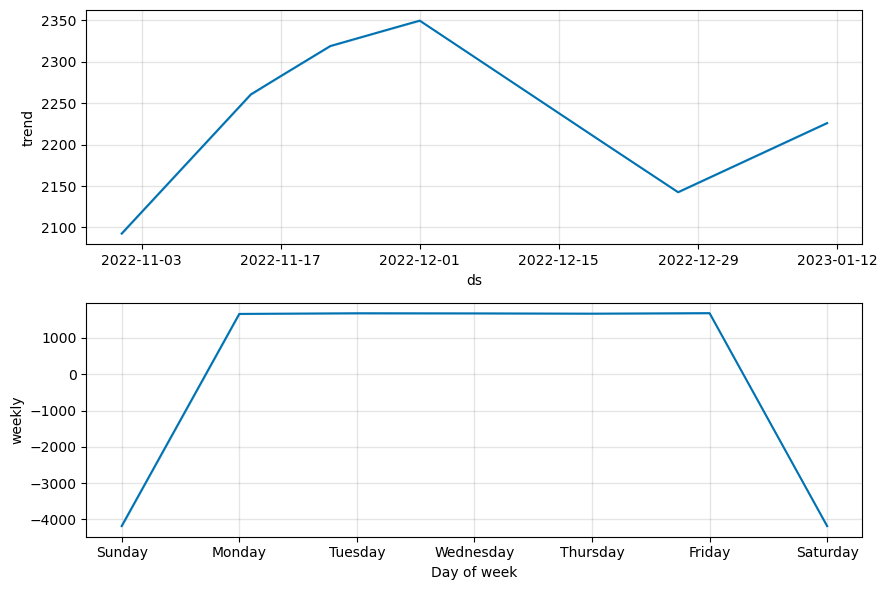

In [236]:
plot2=m.plot_components(forecest_close)

In [237]:
forecest_score.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1.009516,1.304723,2.075507,1.009516,1.009516,0.702610,0.702610,0.702610,0.702610,0.702610,0.702610,0.0,0.0,0.0,1.712126
1,2022-11-02,1.003100,1.460465,2.215120,1.003100,1.003100,0.839965,0.839965,0.839965,0.839965,0.839965,0.839965,0.0,0.0,0.0,1.843065
2,2022-11-03,0.996684,1.458843,2.176035,0.996684,0.996684,0.827146,0.827146,0.827146,0.827146,0.827146,0.827146,0.0,0.0,0.0,1.823830
3,2022-11-04,0.990268,1.459252,2.206020,0.990268,0.990268,0.808481,0.808481,0.808481,0.808481,0.808481,0.808481,0.0,0.0,0.0,1.798749
4,2022-11-07,0.971021,1.391489,2.184906,0.971021,0.971021,0.819861,0.819861,0.819861,0.819861,0.819861,0.819861,0.0,0.0,0.0,1.790881
5,2022-11-08,0.964605,1.299448,2.058465,0.964605,0.964605,0.702610,0.702610,0.702610,0.702610,0.702610,0.702610,0.0,0.0,0.0,1.667215
6,2022-11-09,0.958189,1.425332,2.180470,0.958189,0.958189,0.839965,0.839965,0.839965,0.839965,0.839965,0.839965,0.0,0.0,0.0,1.798154
7,2022-11-10,0.951773,1.394954,2.166429,0.951773,0.951773,0.827146,0.827146,0.827146,0.827146,0.827146,0.827146,0.0,0.0,0.0,1.778919
8,2022-11-11,0.945357,1.371994,2.128285,0.945357,0.945357,0.808481,0.808481,0.808481,0.808481,0.808481,0.808481,0.0,0.0,0.0,1.753838
9,2022-11-14,0.926109,1.402350,2.127502,0.926109,0.926109,0.819861,0.819861,0.819861,0.819861,0.819861,0.819861,0.0,0.0,0.0,1.745970


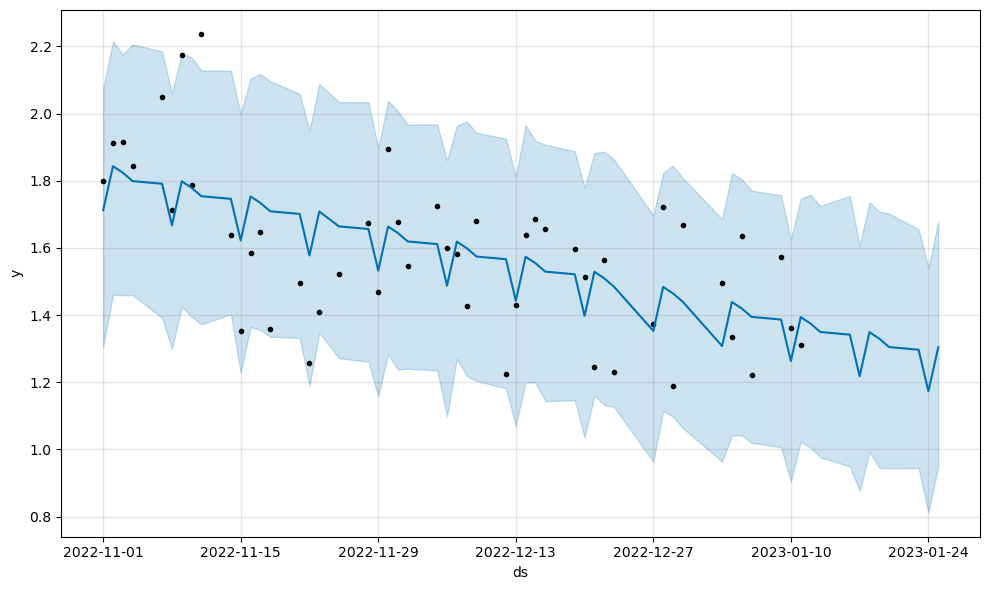

In [238]:
plot_score1=m2.plot(forecest_score)

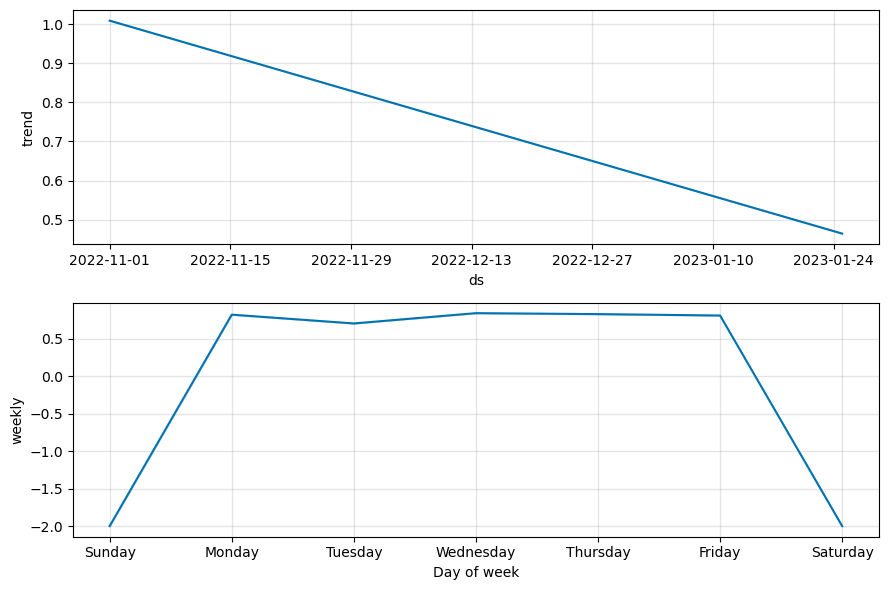

In [239]:
plot_score2=m2.plot_components(forecest_score)

In [205]:
forecast=forecest_close.join(forecest_score,rsuffix="_a")

In [206]:
forecast=forecast.loc[:,["ds","yhat","yhat_a"]]

In [207]:
forecast.info()
#df2['yhat'] = df2['trend'] + df2['seasonal']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      49 non-null     datetime64[ns]
 1   yhat    49 non-null     float64       
 2   yhat_a  49 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 KB


In [208]:
forecast.rename(columns={"yhat":"close","yhat_a":"sentiment_score"},inplace=True)

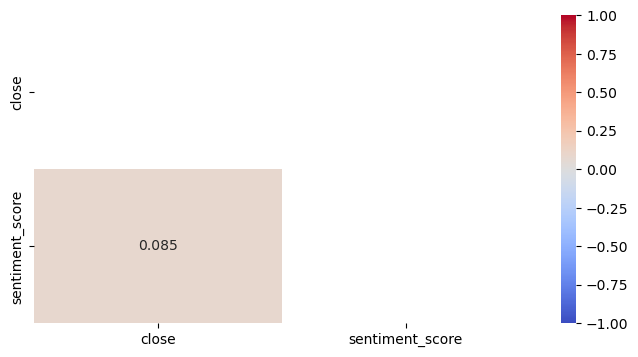

In [209]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=forecast[["close","sentiment_score"]]

matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()